<a href="https://colab.research.google.com/github/fay-55/My_Projects/blob/main/Data_Manipulation/data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metode pada data manipulation sebagai berikut :
- a. Filtering
- b. Sorting
- c. Grouping / Aggregasi
- d. Join / Merging
- e. Pivot
- f. Crosstab
- g. Appending
- h. Mengeksplor terkait dengan operasi pada Datetime (week, day, dan sebagainya)

## Pertanyaan :
- berapa jumlah total dari kolom product line Electronic accessories? <br>
- berapakah jumlah total dari member di cabang a? <br>
- berapakah agregasi max, min, count dari setiap cabang?

## Insight :
- jumlah total dari kolom product line(electronic accessories)<br> adalah = 54337.5315
- jumlah total dari member di cabang a adalah = 53637.4755
- agregasi max, min, count dari setiap cabang adalah = <br>
  Branch max	min	count	<br>
0	A	     10	  1	   340 <br>
1	B	     10	  1	   332 <br>
2	C	     10	  1	   328 <br>

In [ ]:
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np

In [ ]:
df = pd.read_csv("supermarket_sales.csv")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df["Date"] = pd.to_datetime(df["Date"],format="%m/%d/%Y")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
cabang_a = df[df['Branch'] == 'A']

cabang_a.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [ ]:
cabang_a_member = df[(df['Branch'] == 'A') & (df['Customer type'] == 'Member')]
cabang_a_member

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
16,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,2019-03-11,11:03,Credit card,482.51,4.761905,24.1255,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,324-92-3863,A,Yangon,Member,Male,Electronic accessories,20.89,2,2.0890,43.8690,2019-02-05,18:45,Cash,41.78,4.761905,2.0890,9.8
967,195-06-0432,A,Yangon,Member,Male,Home and lifestyle,81.01,3,12.1515,255.1815,2019-01-13,12:55,Credit card,243.03,4.761905,12.1515,9.3
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,2019-03-14,14:19,Ewallet,877.32,4.761905,43.8660,7.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7


In [ ]:
df_filtered = df[df['Unit price'] > df['Unit price'].mean()]
df_filtered

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
penjualan_produk = df.groupby('Product line')['Total'].sum()
penjualan_produk

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [ ]:
penjualan_cabang_pelanggan = df.groupby(['Branch', 'Customer type'])['Total'].sum()
penjualan_cabang_pelanggan

Branch  Customer type
A       Member           53637.4755
        Normal           52562.8950
B       Member           53704.6860
        Normal           52492.9860
C       Member           56881.2825
        Normal           53687.4240
Name: Total, dtype: float64

In [ ]:
df_grouped = df.groupby('Branch')['Total'].sum().reset_index()
df_grouped

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


In [ ]:
df_multiple = df.groupby('Branch')['Quantity'].agg(['max','min','count']).reset_index()
df_multiple

,Branch,max,min,count
0,A,10,1,340
1,B,10,1,332
2,C,10,1,328


In [ ]:
penjualan_terurut = df.sort_values(by='Total', ascending=False)
penjualan_terurut

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.6500,1042.6500,2019-02-15,14:53,Credit card,993.00,4.761905,49.6500,6.6
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.4900,1039.2900,2019-02-08,16:20,Credit card,989.80,4.761905,49.4900,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.2600,1034.4600,2019-01-30,20:23,Ewallet,985.20,4.761905,49.2600,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.7500,1023.7500,2019-01-12,16:18,Ewallet,975.00,4.761905,48.7500,8.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,236-86-3015,C,Naypyitaw,Member,Male,Home and lifestyle,13.98,1,0.6990,14.6790,2019-02-04,13:38,Ewallet,13.98,4.761905,0.6990,9.8
443,192-98-7397,C,Naypyitaw,Normal,Male,Fashion accessories,12.78,1,0.6390,13.4190,2019-01-08,14:11,Ewallet,12.78,4.761905,0.6390,9.5
223,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1,0.6270,13.1670,2019-02-21,12:38,Cash,12.54,4.761905,0.6270,8.2
629,308-39-1707,A,Yangon,Normal,Female,Fashion accessories,12.09,1,0.6045,12.6945,2019-01-26,18:19,Credit card,12.09,4.761905,0.6045,8.2


In [ ]:
tabel_pivot = pd.pivot_table(df, values='Total', index='Product line', columns='Branch', aggfunc='sum')
tabel_pivot

Branch,A,B,C
Product line,,,
Electronic accessories,18317.1135,17051.4435,18968.9745
Fashion accessories,16332.5085,16413.3165,21560.0700
Food and beverages,17163.1005,15214.8885,23766.8550
Health and beauty,12597.7530,19980.6600,16615.3260
Home and lifestyle,22417.1955,17549.1645,13895.5530
Sports and travel,19372.6995,19988.1990,15761.9280


In [ ]:
crosstab = pd.crosstab(df['Branch'], df['Payment'])
crosstab

Payment,Cash,Credit card,Ewallet
Branch,,,
A,110,104,126
B,110,109,113
C,124,98,106


In [ ]:
data1 = {
    'Name': ['Alice', 'Bob'],
    'Age': [24, 27]
    }

df1 = pd.DataFrame(data1)
df1

,Name,Age
0,Alice,24
1,Bob,27


In [ ]:
data2 = {
    'Name': ['Charlie'],
    'Age': [22]
    }
df2 = pd.DataFrame(data2)
df2

,Name,Age
0,Charlie,22


In [ ]:
# Menggabungkan (menumpuk) DataFrame secara vertikal
append_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Menampilkan hasil
append_df

,Name,Age
0,Alice,24
1,Bob,27
2,Charlie,22


In [ ]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df["Month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

def categorize_time(time):
    if time >= pd.to_datetime('05:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Pagi'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('15:00:00').time():
        return 'Siang'
    elif time >= pd.to_datetime('15:00:00').time() and time < pd.to_datetime('18:00:00').time():
        return 'Sore'
    else:
        return 'Malam'

df['Waktu'] = df['Time'].apply(categorize_time)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,year,Waktu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,2019,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,2019,Pagi
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,2019,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,2019,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,2019,Pagi


In [ ]:
detail_cabang = pd.DataFrame({
    'Branch': ['A', 'B', 'C'],
    'Manager': ['John', 'Doe', 'Smith']
})

# Join: Menggabungkan data penjualan dengan data cabang
df_joined = pd.merge(df, detail_cabang, on='Branch', how='left')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,year,Waktu
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,2019,Siang
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,2019,Pagi
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,2019,Siang
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,2019,Malam
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,2019,Pagi


In [ ]:
pd.merge(df, detail_cabang, on='Branch', how='left')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayOfWeek,Month,year,Waktu,Manager
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,2019,Siang,John
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,2019,Pagi,Smith
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,2019,Siang,John
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,2019,Malam,John
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,2019,Pagi,John
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,1,2019,Siang,Smith
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,3,2019,Sore,Doe
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Saturday,2,2019,Siang,John
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Friday,2,2019,Sore,John


# 2. Standar Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [ ]:
#from sklearn.preprocessing import StandardScaler
#columns_to_stdscaler = ['Total', 'Unit price', 'cogs', 'Quantity']
#scaler = StandardScaler()

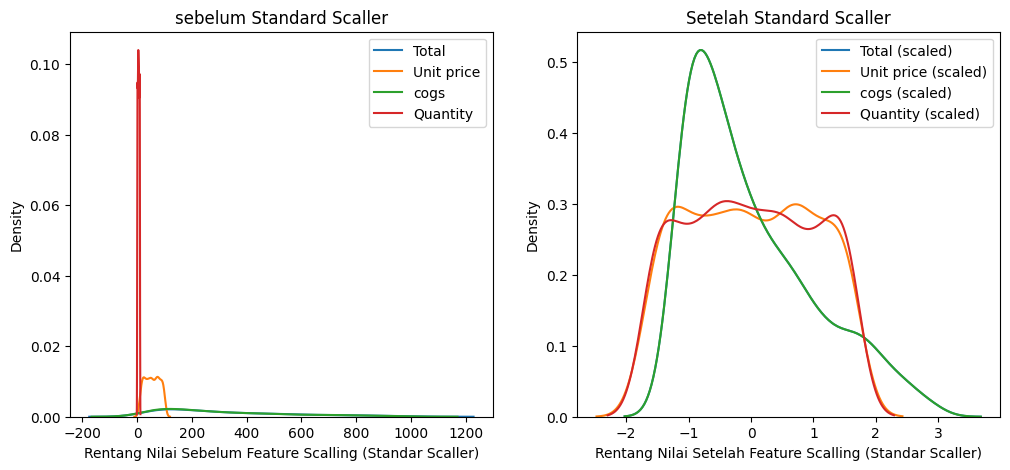

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

columns_to_stdscaler = ['Total', 'Unit price', 'cogs', 'Quantity']
scaler = StandardScaler()

# Buat salinan DataFrame
df_scaled = df.copy()
#df_scaled[['Total_stds', 'Unit price_stds', 'cogs_stds', 'Quantity_stds']]
df_scaled[['Total_stds', 'Unit price_stds', 'cogs_stds', 'Quantity_stds']] = scaler.fit_transform(df[columns_to_stdscaler])

#df_scaled[columns_to_stdscaler] = scaler.fit_transform(df[columns_to_stdscaler])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#ax1.set_title('Sebelum Standar Scaller')
ax1.set_title('sebelum Standard Scaller')
sns.kdeplot(df_scaled['Total'], ax=ax1, label='Total')
sns.kdeplot(df_scaled['Unit price'], ax=ax1, label='Unit price')
sns.kdeplot(df_scaled['cogs'], ax=ax1, label='cogs')
sns.kdeplot(df_scaled['Quantity'], ax=ax1, label='Quantity')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(df_scaled['Total_stds'], ax=ax2, label='Total (scaled)')
sns.kdeplot(df_scaled['Unit price_stds'], ax=ax2, label='Unit price (scaled)')
sns.kdeplot(df_scaled['cogs_stds'], ax=ax2, label='cogs (scaled)')
sns.kdeplot(df_scaled['Quantity_stds'], ax=ax2, label='Quantity (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

## insight
- sebelum di standar scaller, Quantity memiliki density yang tinggi
- sesudah standar scaller, Quantity mengalami penurunan density
- cogs memilki pesebaran yang tinggi sebelum di standar scalling
- unit price tidak memiliki perbedaan kurva yang significan
- perbedaan skala di sumbu x antara 2 histogram


In [ ]:
df_scaled[['Total','Total_stds']].head()

,Total,Total_stds
0,548.9715,0.919607
1,80.2200,-0.987730
2,340.5255,0.071446
3,489.0480,0.675780
4,634.3785,1.267125


In [ ]:
df_scaled[['Total','Total_stds']].describe()

,Total,Total_stds
count,1000.000000,1.000000e+03
mean,322.966749,3.197442e-17
std,245.885335,1.000500e+00
min,10.678500,-1.270692e+00
25%,124.422375,-8.078714e-01
50%,253.848000,-2.812422e-01
75%,471.350250,6.037682e-01
max,1042.650000,2.928371e+00


# 3. MinMax Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test,
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

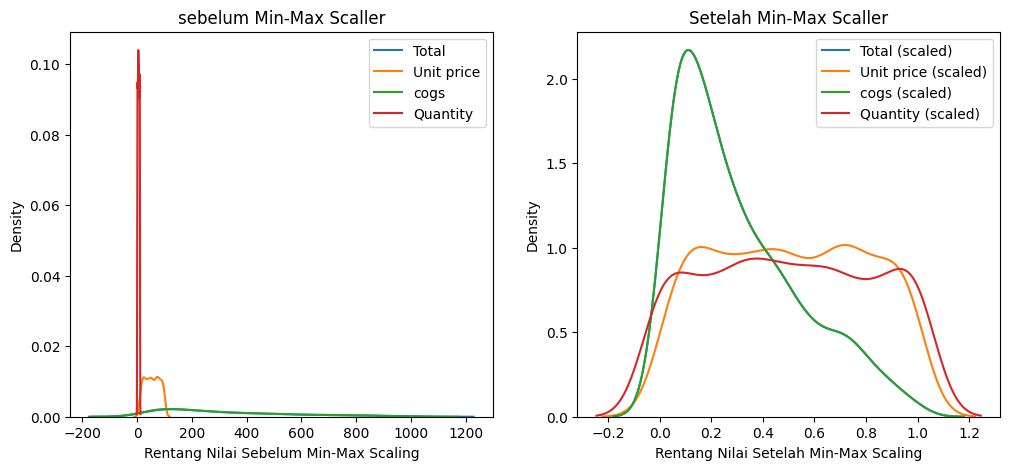

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

columns_to_minmax = ['Total', 'Unit price', 'cogs', 'Quantity']
minmax = MinMaxScaler()

# Buat salinan DataFrame
df_scaled = df.copy()

df_scaled[['Total_minmax', 'Unit price_minmax', 'cogs_minmax', 'Quantity_minmax']] = minmax.fit_transform(df[columns_to_minmax])

#df_scaled[columns_to_stdscaler] = scaler.fit_transform(df[columns_to_stdscaler])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#ax1.set_title('Sebelum Standar Scaller')
ax1.set_title('sebelum Min-Max Scaller')
sns.kdeplot(df_scaled['Total'], ax=ax1, label='Total')
sns.kdeplot(df_scaled['Unit price'], ax=ax1, label='Unit price')
sns.kdeplot(df_scaled['cogs'], ax=ax1, label='cogs')
sns.kdeplot(df_scaled['Quantity'], ax=ax1, label='Quantity')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Min-Max Scaller')
sns.kdeplot(df_scaled['Total_minmax'], ax=ax2, label='Total (scaled)')
sns.kdeplot(df_scaled['Unit price_minmax'], ax=ax2, label='Unit price (scaled)')
sns.kdeplot(df_scaled['cogs_minmax'], ax=ax2, label='cogs (scaled)')
sns.kdeplot(df_scaled['Quantity_minmax'], ax=ax2, label='Quantity (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [ ]:
df_scaled[['Total','Total_minmax']].head()

,Total,Total_minmax
0,548.9715,0.521616
1,80.2200,0.067387
2,340.5255,0.319628
3,489.0480,0.463549
4,634.3785,0.604377


In [ ]:
df_scaled[['Total','Total_minmax']].describe()

,Total,Total_minmax
count,1000.000000,1000.000000
mean,322.966749,0.302613
std,245.885335,0.238268
min,10.678500,0.000000
25%,124.422375,0.110220
50%,253.848000,0.235636
75%,471.350250,0.446400
max,1042.650000,1.000000


## insight
- perbedaan pada Unit Price dan Quantity sebelum di minmax scalling dan setelahnya adalah pesebaran nya lebih tinggi dari sebelum di minmax scalling
- setelah minmax scalling, cogs memiliki density tertinggi
